In this analysis, we want to find out which attributes lead us to create the best chocolate taste. The only possible measure in our dataset is Rating. In continue we'll start to EDA(Exploratory Data Analysis) with plotting columns against each other and numeric stats.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
chocolate = pd.read_csv("D:/chocolate.csv", index_col= 0)

In [3]:
chocolate.head(5)


,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


### 1) Percent of Cocoa with the highest and most consumer ratings

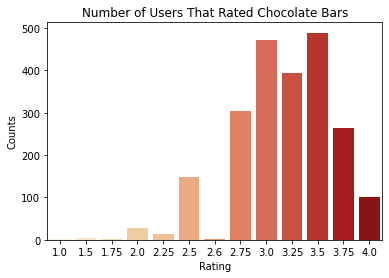

In [4]:
sns.countplot(x= "rating", data= chocolate, palette= sns.color_palette("OrRd", 13))
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Number of Users That Rated Chocolate Bars")
plt.show()

First of all, we should have a glance at Rating column because its the measurement of our analysis and with these values we'll extract pieces of information that we need.Our dataset have more than 2200 chocolate bar in 67 countries around the world with full stats contains: Taste, Ingredients, Cocoa Percentage, Company Location, and Company Name.The previous figure reveals most rating count is the range of 3 to 3.5 about 61 percent of rates is distributed in this range, this reveals important ratings. The most number of ratings that were given is 3.5 with a number of around 500 ratings.

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


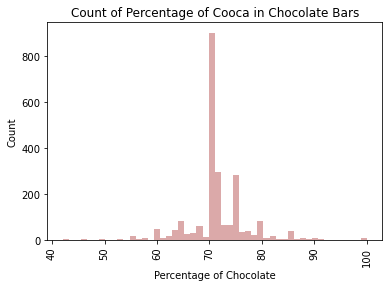

In [5]:
sns.distplot(chocolate["cocoa_percent"],kde= False, color= "brown")
plt.title("Count of Percentage of Cooca in Chocolate Bars")
plt.xlabel("Percentage of Chocolate")
plt.ylabel("Count")
plt.xticks(rotation= 90)
plt.show()


As figure 2 shows us, most chocolate bars are made with around 70 to 75% cocoa in the bar. Mote than 900 chocolate bars being made with 70% cocoa. Less than one hundred bars are made with 60% or less cocoa, and the number is even smaller for chocolate bars with 80% or higher cocoa in them. Does the data tell us anything about how consumers are rating chocolate bars based on the percentage of cocoa that is used in each bar? The following figure aims to observe if there is a relationship between the percent of cocoa used, and consumer ratings.



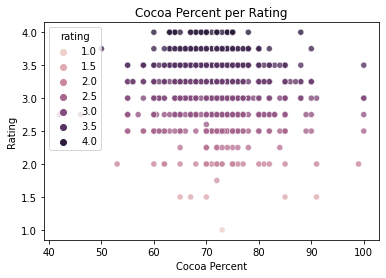

In [6]:
sns.scatterplot(x= "cocoa_percent", y= "rating", data= chocolate, hue= "rating", alpha= .8)
plt.title("Cocoa Percent per Rating")
plt.xlabel("Cocoa Percent")
plt.ylabel("Rating")
plt.show()

As the result shows we have the distribution of two variables, Cocoa Percent and Rating. A large proportion of chocolate bars are made in a range of 60% to 80%. A closer look at the range of ratings telling us that in higher ratings, cocoa percentage limited to 70%. Another observation to note is we don't have any correlation between variables and about 3 outliers in 40% to 50% span. as well as shows off we don't have chocolate bars highly variable, not falling below 40 percent. Chocolate bars are popular in a range of 60 to 80 percent. In sum, we can take this information and apply chocolate sales. This figure shows us people's tastes about cocoa percent and we can predict feature behavior for companies' campaigns. Later we'll check which countries are the best chocolate bars with the highest rates.



### 2) Countries of Bean Origin VS Country of Countries with Highest Amount of Chocolate Vendors

In [7]:
countries_with_most_amount_of_vendors = chocolate["company_location"].value_counts().nlargest(15).to_frame()
highest_producers = chocolate['country_of_bean_origin'].value_counts().nlargest(15).to_frame()


In [8]:
chocolate["company_location"].value_counts(normalize= True).nlargest(1).to_frame()


,company_location
U.S.A,0.426259


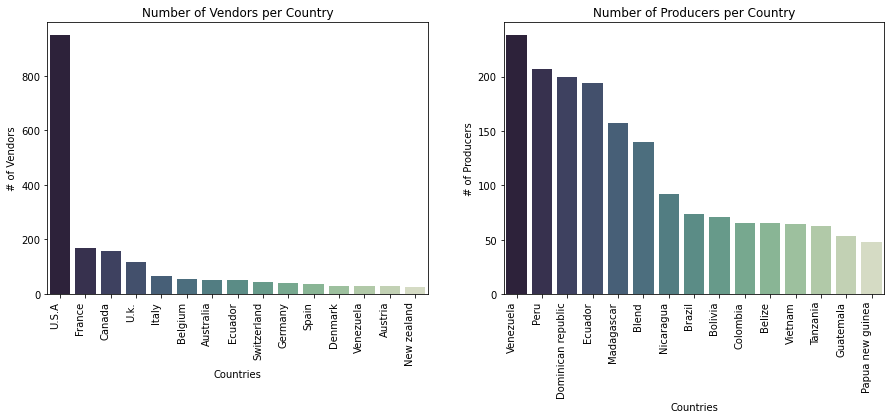

In [9]:
fig, axis = plt.subplots(1,2,figsize=(15,5))
vendors= sns.barplot(x= countries_with_most_amount_of_vendors.index, y= "company_location",
            data= countries_with_most_amount_of_vendors, 
            palette= sns.cubehelix_palette(15, start=.5, rot=-.75, reverse= True), ax=axis[0])
producers= sns.barplot(x= highest_producers.index, y= "country_of_bean_origin",
            data= highest_producers, 
            palette= sns.cubehelix_palette(15, start=.5, rot=-.75, reverse= True), ax= axis[1])

vendors.set_title("Number of Vendors per Country")
vendors.set_xlabel("Countries")
vendors.set_ylabel("# of Vendors")
plt.setp(vendors.get_xticklabels(), rotation=90, ha='right')

producers.set_title("Number of Producers per Country")
producers.set_xlabel("Countries")
producers.set_ylabel("# of Producers")
plt.setp(producers.get_xticklabels(), rotation=90, ha='right')

plt.show()

A glance at two obtained figures obviously reveals that developed countries are the vendors and developing countries are only make Beans. The USA has more than 900 vendors and more than 42 percent proportion of the market.

#### Distribution  Of Review  Date And Rating

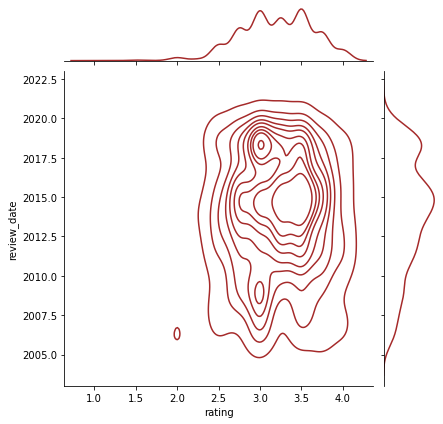

In [10]:
sns.jointplot(x= "rating", y= "review_date", data= chocolate, kind= "kde", color= "brown")
plt.show()

As shown by the above figure it's obvious that in the range of 2010 to 2017 we had better ratings, and more ratings, other times like 2005 to 2010 number of reviews and rates were less than the late years.

### 3) Highest Rated Company

In [11]:
best_chocolate_bars= chocolate[chocolate["rating"] == 4]
best_chocolate_bars["company"].value_counts().nlargest(1).to_frame()

,company
Soma,13


As shown Soma Company have most 4 rating that is a great result. In continue we'll analyze Soma vs Other companies and then we're going to learn best recipe for 4 ratings. Ingredients are an important part of making chocolate bars.



In [12]:
soma_company_dataframe= chocolate[chocolate["company"] == "Soma"]
other_copmany_except_dataframe= chocolate[chocolate["company"] != "Soma"]
print("Mean of Soma Company chocolate Bars:", round(soma_company_dataframe["rating"].mean(), 2))
print("Mean of Other Chocolate Bars:", round(other_copmany_except_dataframe["rating"].mean(), 2))


Mean of Soma Company chocolate Bars: 3.59
Mean of Other Chocolate Bars: 3.19


In [13]:
list_of_keys= ["Soma", "Others"]
list_of_values= [round(soma_company_dataframe["rating"].mean(), 2), round(other_copmany_except_dataframe["rating"].mean(), 2)]

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


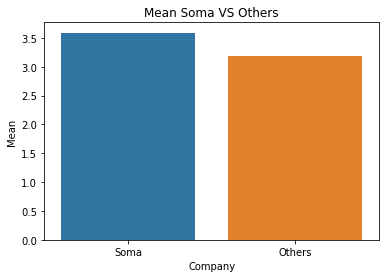

In [14]:
sns.barplot(list_of_keys, list_of_values)
plt.title("Mean Soma VS Others")
plt.ylabel("Mean")
plt.xlabel("Company")
plt.show()


It's easy to see Soma have a better mean of rating against other companies, about 0.4 in rating difference between two categories is a great motivation to find out recipe and ingredients pattern to follow their way.



In [15]:
soma_company_dataframe.loc[:, "beans":"sweetener_without_sugar"].describe()


,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
count,52,52,52,52,52,52,52
unique,1,1,1,1,1,1,1
top,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
freq,52,52,52,52,52,52,52


Above chart reveals recepie. WOW \ Must use: Beans, Cocoa Butter and Sugar \ Dont use: Vanilla, lecithin and sweetener without Sugar



### 4) Favotire Tastes


We have another dataset that contains all 4 tastes columns, we add them in one column and analyze them for finding out most frequent tastes



In [17]:
chocolate_taste= pd.read_csv("D:/chocolate_taste_dataset.csv", index_col= "taste")\
                            .sort_values(by= "count_of_taste", ascending= False)[1:]
first_20_taste= chocolate_taste[:20]

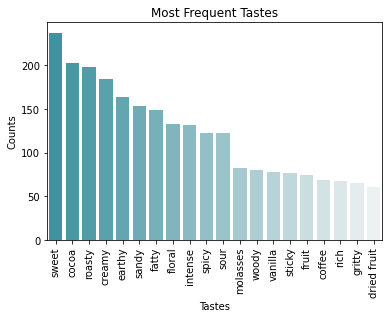

In [18]:
sns.barplot(x= first_20_taste.index, y= "count_of_taste", data= first_20_taste,
            palette= sns.light_palette((210, 90, 60), input="husl", n_colors= 20, reverse= True))
plt.xticks(rotation= 90)
plt.title("Most Frequent Tastes")
plt.xlabel("Tastes")
plt.ylabel("Counts")
plt.show()

We plot the most frequent tastes in data sets. Clearly this can be the favorite taste in community, companies making these tastes due to the people's requests.

